In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import latexStrings as ls
import mca

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

%matplotlib qt5

In [2]:
data = pd.read_csv("data/heart.data").dropna()
data.index = range(data.shape[0])
# 297 observaciones despues de quitar nan

In [ ]:
data.rename(columns = {"target":"diagnosis", "cp": "chest_pain", "trestbps": "rest_bp",
                      "restecg":"rest_ecg"}, inplace = True)

In [3]:
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age           297 non-null float64
sex           297 non-null float64
chest_pain    297 non-null float64
rest_bp       297 non-null float64
chol          297 non-null float64
fbs           297 non-null float64
rest_ecg      297 non-null float64
thalach       297 non-null float64
exang         297 non-null float64
oldpeak       297 non-null float64
slope         297 non-null float64
ca            297 non-null float64
thal          297 non-null float64
diagnosis     297 non-null int64
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


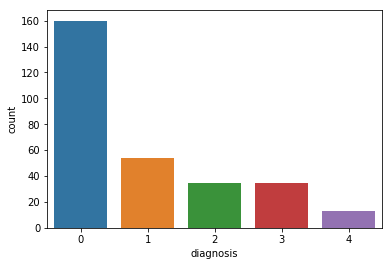

In [5]:
sns.countplot(x = "diagnosis", data = data)

In [6]:
# Diccionarios con los nombres de categorias
sex_cat = {0 : "female", 
           1 : "male"}

chest_pain_cat = {1 : "typical angina", 
                  2 : "atypical angina",
                  3 : "non-anginal pain",
                  4 : "asymptomatic"}

# Fasting blood sugar
fbs_cat = {0 : "<= 120mg/dl",
       1 : "> 120mg/dl"}

# Rersting ECG
rest_ecg = {0 : "normal",
            1 : "ST-T wave abnormality",
            2 : "probable left ventricular hypertrophy"}

# Excercise induced angina
exang = {0 : "no",
         1 : "yes"}

# slope of peak excersice ST segment
slope = {1 : "upsloping",
         2 : "flat",
         3 : "downsloping"}

# https://www.medilexicon.com/dictionary/72223
thal = {3 : "normal",
        6 : "fixed defect",
        7 : "reversable defect"}

In [7]:
# Juntar los valores 1, 2, 3, 4 de diagnosis al nuevo valor 1 (para q diagnosis sea v o f)
data["diagnosis"] = np.where(data["diagnosis"] > 0, 1, 0)
data.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
# Indices de vars categoricas y vars de razon
# ca (11) es categorica? numero de vessels iluminados en fluroscopia
cat_index = [0,1, 2, 5, 6, 8, 10, 11, 12]
num_index = [3, 4, 7, 9]
data.iloc[:, cat_index].head()

,age,sex,chest_pain,fbs,rest_ecg,exang,slope,ca,thal
0,63.0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,67.0,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,67.0,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,37.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0
4,41.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0


In [9]:
data.iloc[:, num_index].head()

,rest_bp,chol,thalach,oldpeak
0,145.0,233.0,150.0,2.3
1,160.0,286.0,108.0,1.5
2,120.0,229.0,129.0,2.6
3,130.0,250.0,187.0,3.5
4,130.0,204.0,172.0,1.4


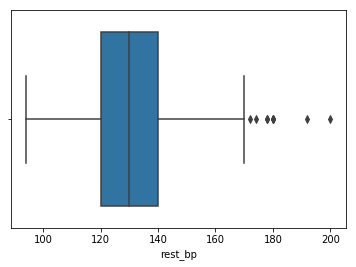

In [10]:
sns.boxplot(x = 'rest_bp', data = data)

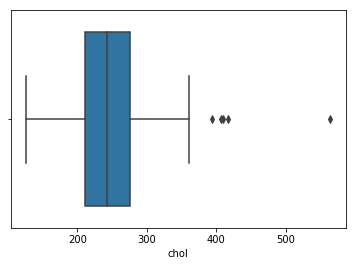

In [11]:
sns.boxplot(x = 'chol', data = data)

In [12]:
max(data['chol'])

564.0

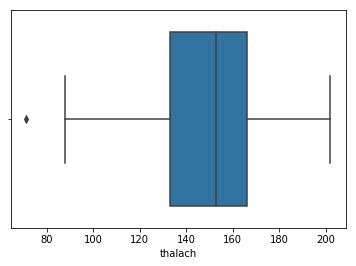

In [13]:
sns.boxplot(x = 'thalach', data = data)

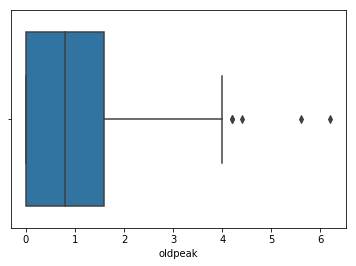

In [14]:
sns.boxplot(x = 'oldpeak', data = data)

In [15]:
max(data['oldpeak'])

6.2

In [16]:
X_num = data.iloc[:, num_index]
X_num_std = pd.DataFrame()

In [17]:
for col in X_num.columns:
    X_num_std[col] = preprocessing.scale(X_num[col])

In [18]:
X_num_std.head()

,rest_bp,chol,thalach,oldpeak
0,0.750380,-0.276443,0.017494,1.068965
1,1.596266,0.744555,-1.816334,0.381773
2,-0.659431,-0.353500,-0.899420,1.326662
3,-0.095506,0.051047,1.633010,2.099753
4,-0.095506,-0.835103,0.978071,0.295874


In [19]:
processed_data = X_num_std.join(data.iloc[:, cat_index])

### EDA

In [22]:
index = num_index.copy()
index.append(0)

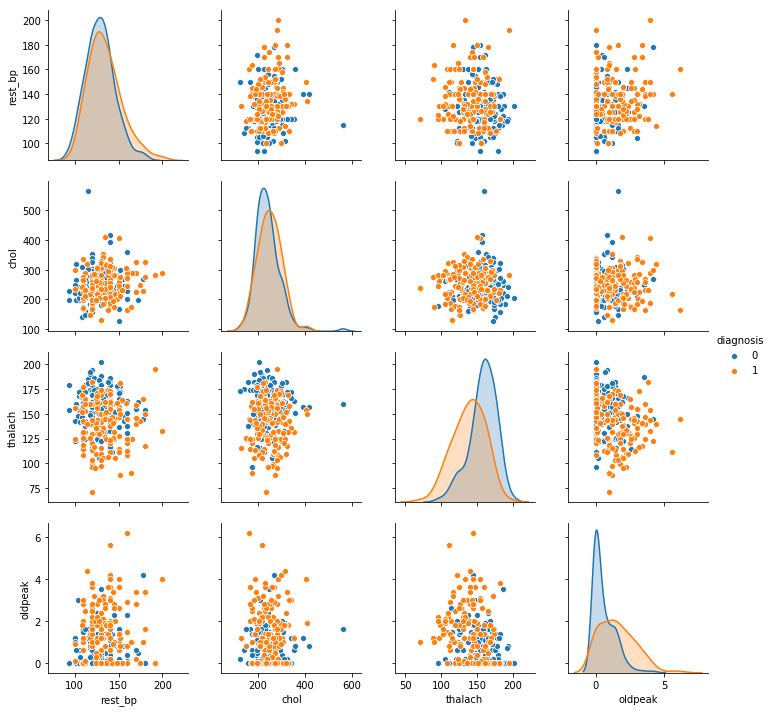

In [23]:
# histogramas para vars 
sns.pairplot(data, vars = data.columns[num_index], hue = "diagnosis")
plt.show()

In [24]:
processed_data['diagnosis'] = data['diagnosis']

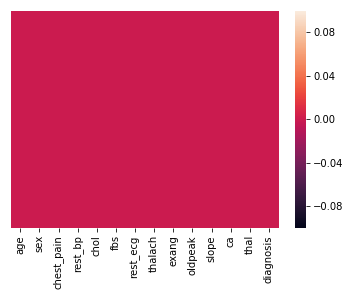

In [25]:
sns.heatmap(data=data.isnull(),yticklabels=False)

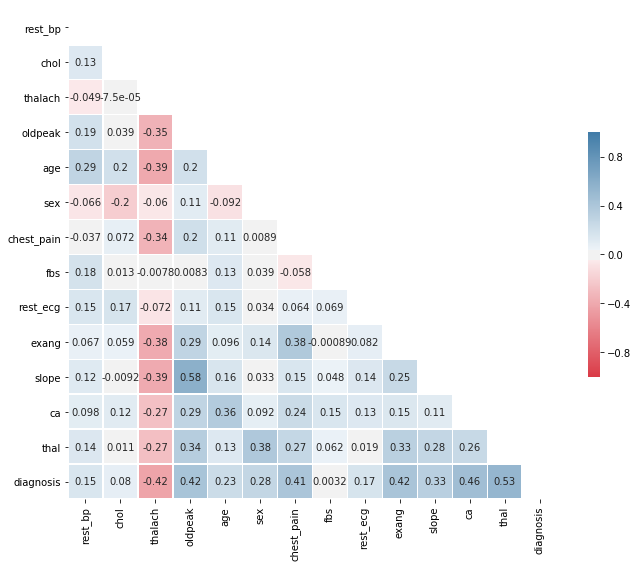

In [80]:
# Correlaciones
corr = processed_data.corr()

# plot correlation matrix
fig = plt.figure(figsize=(11, 9))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin = -1, vmax = 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
#plt.savefig('graphs/correlaciones.png', dpi = 300)

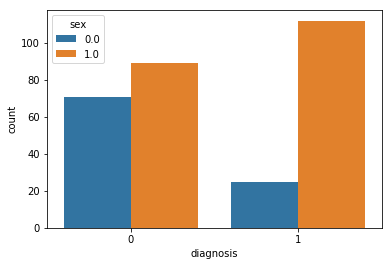

In [30]:
sns.countplot(x="diagnosis", data=processed_data, hue='sex')

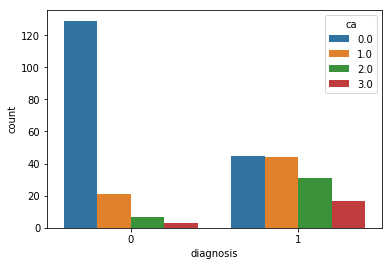

In [31]:
sns.countplot(x="diagnosis", data=processed_data, hue='ca')

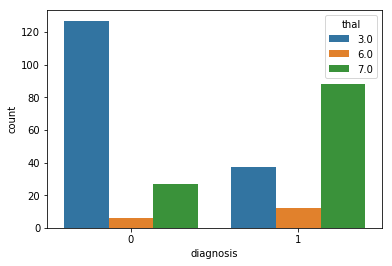

In [32]:
sns.countplot(x="diagnosis", data=processed_data, hue='thal')

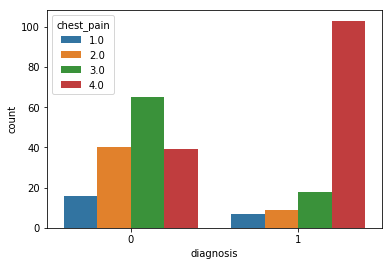

In [33]:
sns.countplot(x="diagnosis", data=processed_data, hue='chest_pain')

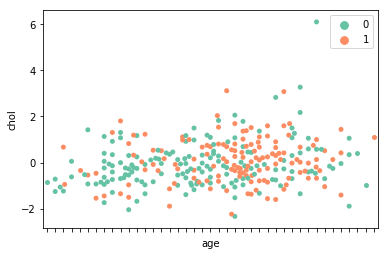

In [35]:
swarmPlot = sns.swarmplot(x = 'age', y = 'chol', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

In [ ]:
swarmPlot = sns.swarmplot(x = 'age', y = 'chol', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

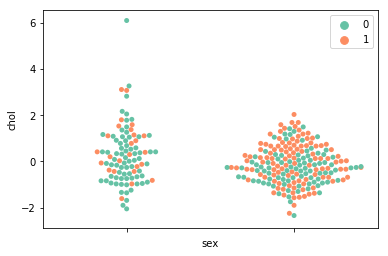

In [36]:
swarmPlot = sns.swarmplot(x = 'sex', y = 'chol', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

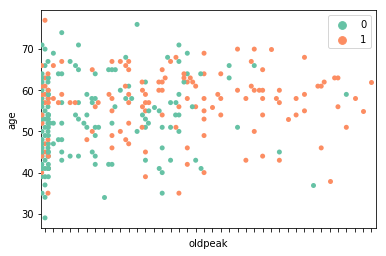

In [39]:
swarmPlot = sns.swarmplot(x = 'oldpeak', y = 'age', data=processed_data, hue='diagnosis', palette='Set2')
swarmPlot.set(xticklabels=[])
swarmPlot.legend(loc='upper right')

In [ ]:
sns.scatterplot(x = 'age', y = 'chol', data = processed_data, hue = 'diagnosis')

In [ ]:
sns.scatterplot(x = 'chol', y = 'thalach', data = processed_data, hue = 'diagnosis')

In [ ]:
sns.scatterplot(x = 'age', y = 'chol', data = processed_data, hue = 'diagnosis')

### Clusters

In [40]:
from sklearn.cluster import KMeans


In [41]:
kmeans = KMeans(n_clusters=3)


In [47]:
cluster_data = data[data['diagnosis']==1][['sex','chol']]

In [48]:
kmeans.fit(cluster_data)
cluster_data['labels'] = kmeans.labels_
cluster_data.head()

,sex,chol,labels
1,1.0,286.0,1
2,1.0,229.0,2
6,0.0,268.0,2
8,1.0,254.0,2
9,1.0,203.0,0


[[]]

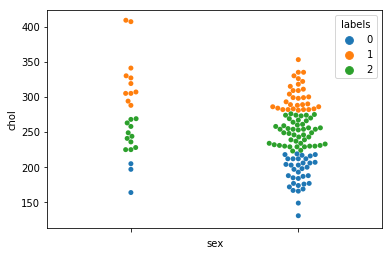

In [49]:
swarmPlot =  sns.swarmplot(x="sex", y="chol", data=cluster_data, hue='labels')
swarmPlot.set(xticklabels=[])

### Dummy var

In [50]:
X = processed_data.drop(columns = ['diagnosis'])
y = processed_data['diagnosis']

In [51]:
X['sex'] = processed_data['sex'].map(sex_cat)
X['chest_pain'] = processed_data['chest_pain'].map(chest_pain_cat)
X['rest_ecg'] = processed_data['rest_ecg'].map(rest_ecg)
#X['fbs'] = data['fbs'].map(fbs_cat)
X['exang'] = processed_data['exang'].map(exang)
X['slope'] = processed_data['slope'].map(slope)
X['thal'] = processed_data['thal'].map(thal)

In [52]:
X.isnull().sum()

rest_bp       0
chol          0
thalach       0
oldpeak       0
age           0
sex           0
chest_pain    0
fbs           0
rest_ecg      0
exang         0
slope         0
ca            0
thal          0
dtype: int64

In [53]:
X = pd.get_dummies(X, columns =['sex', 'chest_pain','rest_ecg','fbs','exang','slope','thal','ca'], 
                   prefix = ['is','has','ecg','fbs','exang','slope','thal','ca'],drop_first = True)



In [54]:
X.head()

,rest_bp,chol,thalach,oldpeak,age,is_male,has_atypical angina,has_non-anginal pain,has_typical angina,ecg_normal,ecg_probable left ventricular hypertrophy,fbs_1.0,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0
0,0.750380,-0.276443,0.017494,1.068965,63.0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0
1,1.596266,0.744555,-1.816334,0.381773,67.0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1
2,-0.659431,-0.353500,-0.899420,1.326662,67.0,1,0,0,0,0,1,0,1,1,0,0,1,0,1,0
3,-0.095506,0.051047,1.633010,2.099753,37.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0
4,-0.095506,-0.835103,0.978071,0.295874,41.0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0


### Logit simple

In [ ]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 158999)

In [ ]:
len(y_train)

In [ ]:
len(y_test)

In [ ]:
logit = sm.Logit(y_train,X_train1)
logit_model = logit.fit()

In [ ]:
logit_model.summary()

In [ ]:
X_train2 = X_train1.drop(columns = ['age','chol', 'slope_flat', 'slope_upsloping',
                                     'ecg_normal','ecg_probable left ventricular hypertrophy',
                                   'fbs_1.0','exang_yes'])

In [ ]:
X_train2.head()

In [ ]:
logit2 = sm.Logit(y_train,X_train2)
logit_model2 = logit2.fit()

In [ ]:
logit_model2.summary()

In [ ]:
logmodel = LogisticRegression(class_weight = "balanced")
logmodel.fit(X_train1,y_train)

### LDA

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 158999)

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [57]:
lda_test = LinearDiscriminantAnalysis(n_components=4)

In [60]:
X_lda_train = lda_test.fit_transform(X_train, y_train)
X_lda_test = lda_test.transform(X_test)

In [73]:
lda_logit = sm.Logit(y_train,X_lda_train)
lda_logit_model = lda_logit.fit()

lda_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.314862
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  237
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            0
Date:                Mon, 06 May 2019   Pseudo R-squ.:                  0.5408
Time:                        23:58:01   Log-Likelihood:                -74.622
converged:                       True   LL-Null:                       -162.50
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0295      0.253      8.025      0.000       1.534       2.525
==============================================================================
"""

In [74]:
log_lda_model = LogisticRegression(class_weight = "balanced")
log_lda_model.fit(X_lda_train,y_train)
predictions_lda = log_lda_model.predict(X_lda_test)
print('LDA with Components =', 2)
print(classification_report(y_test,predictions_lda))

LDA with Components = 2
             precision    recall  f1-score   support

          0       0.77      0.85      0.81        27
          1       0.87      0.79      0.83        33

avg / total       0.82      0.82      0.82        60



In [62]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

### MCA

In [81]:
# Tablas de contingencia de diagnosis vs vars categoricas
for att in data.columns[cat_index]:
    M = []
    print("Var = " + att )
    vals = np.unique(data[att]).astype(int)
    for val in vals:
        M.append([data.query(att + " == " + str(val) + " and diagnosis == 0").shape[0], 
                  data.query(att + " == " + str(val) + " and diagnosis == 1").shape[0]])
    print("Matriz de Contingencia: ")
    print(ls.indexedMatrix(np.array(M, dtype = int).T, ['0', '1'], vals), '\n')

Var = age
Matriz de Contingencia: 
\begin{blockarray}{cccccccccccccccccccccccccccccccccccccccccc}
 & 29 & 34 & 35 & 37 & 38 & 39 & 40 & 41 & 42 & 43 & 44 & 45 & 46 & 47 & 48 & 49 & 50 & 51 & 52 & 53 & 54 & 55 & 56 & 57 & 58 & 59 & 60 & 61 & 62 & 63 & 64 & 65 & 66 & 67 & 68 & 69 & 70 & 71 & 74 & 76 & 77
\begin{block}{c(ccccccccccccccccccccccccccccccccccccccccc)}
0 & 1 & 2 & 2 & 2 & 0 & 3 & 1 & 9 & 7 & 5 & 8 & 6 & 4 & 3 & 4 & 3 & 4 & 9 & 8 & 5 & 10 & 3 & 5 & 7 & 6 & 5 & 3 & 1 & 4 & 3 & 6 & 4 & 4 & 3 & 2 & 2 & 1 & 3 & 1 & 1 & 0 \\ 
1 & 0 & 0 & 2 & 0 & 1 & 1 & 2 & 1 & 1 & 2 & 3 & 2 & 3 & 2 & 3 & 2 & 3 & 3 & 3 & 2 & 6 & 5 & 6 & 10 & 12 & 9 & 9 & 7 & 7 & 6 & 4 & 4 & 3 & 6 & 2 & 1 & 3 & 0 & 0 & 0 & 1 \\ 
\end{block}
\end{blockarray} 

Var = sex
Matriz de Contingencia: 
\begin{blockarray}{ccc}
 & 0 & 1
\begin{block}{c(cc)}
0 & 71 & 89 \\ 
1 & 25 & 112 \\ 
\end{block}
\end{blockarray} 

Var = chest_pain
Matriz de Contingencia: 
\begin{blockarray}{ccccc}
 & 1 & 2 & 3 & 4
\begin{block}{c(cccc)}
0

In [82]:
# MCA
labels = ['sex', 'chest_pain', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal']
mca_ben = mca.MCA(data, cols = labels)

In [83]:
mca_ben.L

array([0.03560743, 0.00199655, 0.00141772, 0.00046124, 0.00023844])

In [84]:
mca_ben.expl_var(greenacre=True, N=5)

array([0.70934877, 0.03977402, 0.02824292, 0.00918853, 0.00474995])

In [85]:
multi = [[], []]
for l in labels:
    for val in np.unique(data[l]).astype(int):
        multi[0] += [l]
        multi[1] += [str(val)]

mca_c_df = pd.DataFrame(data = mca_ben.fs_c(N=5), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"],
                        index = multi)
mca_c_df

Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
sex        0 -0.201002  0.030414  0.078426 -0.021534 -0.022564
           1  0.096001 -0.014526 -0.037457  0.010285  0.010777
chest_pain 1 -0.017422 -0.182367 -0.068036 -0.043623  0.003457
           2 -0.347495  0.014910 -0.048723 -0.033033  0.027892
           3 -0.214006 -0.013944  0.030260  0.057883 -0.016284
           4  0.247820  0.032543  0.010146 -0.015369 -0.000667
fbs        0 -0.012846  0.027544  0.002278 -0.005175  0.006918
           1  0.075880 -0.162704 -0.013458  0.030570 -0.040866
rest_ecg   0 -0.094105  0.026514 -0.024055  0.001851  0.010439
           1  0.262997  0.018675  0.530828 -0.010281  0.114168
           2  0.087544 -0.027208  0.009677 -0.001582 -0.013639
exang      0 -0.164206 -0.019440 -0.000668  0.003749 -0.000972
           1  0.338568  0.040083  0.001376 -0.007730  0.002003
slope      1 -0.210826  0.007602 -0.036985  0.001844 -0.001525
           2  0.188908  0.022850  0.029409 -0.001903 -0.007310
           3  0.163072 -0.199383  0.052944  0.000208  0.057778
ca         0 -0.148325 -0.007602  0.004356 -0.007694  0.012810
           1  0.146306  0.062595 -0.025086  0.044939 -0.006077
           2  0.262203 -0.038950 -0.030460 -0.081223 -0.051627
           3  0.316745 -0.063290  0.101502  0.075206  0.006392
thal       3 -0.229768  0.004765  0.019351 -0.006825 -0.006832
           6  0.362124 -0.171315  0.063052 -0.035949  0.043818
           7  0.270988  0.020020 -0.037465  0.015360  0.002885

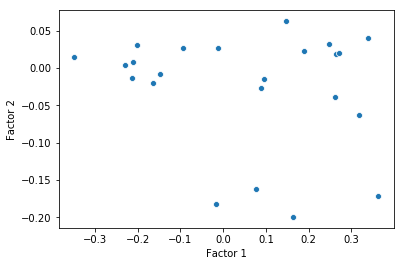

In [86]:
# plot columnas
# mayb hacer un mejor plot, dando figura a cada atributo y diferentes colores por valor
sns.scatterplot(x = "Factor 1", y = "Factor 2", data = mca_c_df)
plt.show()

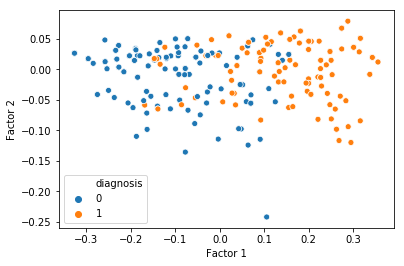

array([1.03297252, 0.02276143])

In [87]:
mca_r_df = pd.DataFrame(data = mca_ben.fs_r(N=5), columns = ["Factor 1", "Factor 2", "Factor 3", "Factor 4", "Factor 5"])

mca_r_df["diagnosis"] = data["diagnosis"]
mca_r_df

# plot de renglones
sns.scatterplot(x = "Factor 1", y = "Factor 2", data = mca_r_df, hue = "diagnosis")
plt.show()

X = data.iloc[:, cat_index].values

x = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0]

mca_ben.fs_r(N=2)

np.dot(x, mca_ben.fs_c(N=2))